In [4]:
from functions import *

# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results_proposed_and_simulator/result_summary.csv"
time_data = parse_time_data(summary_result_path)

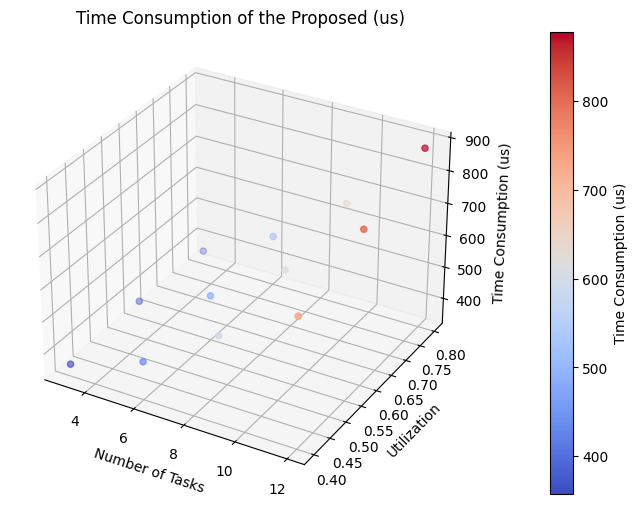

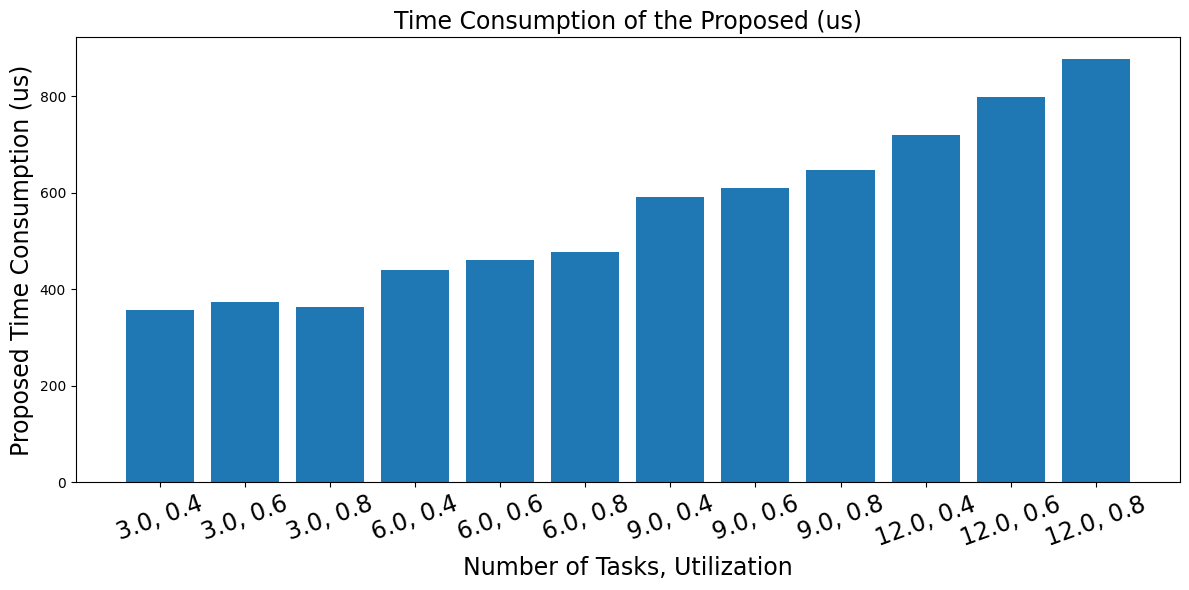

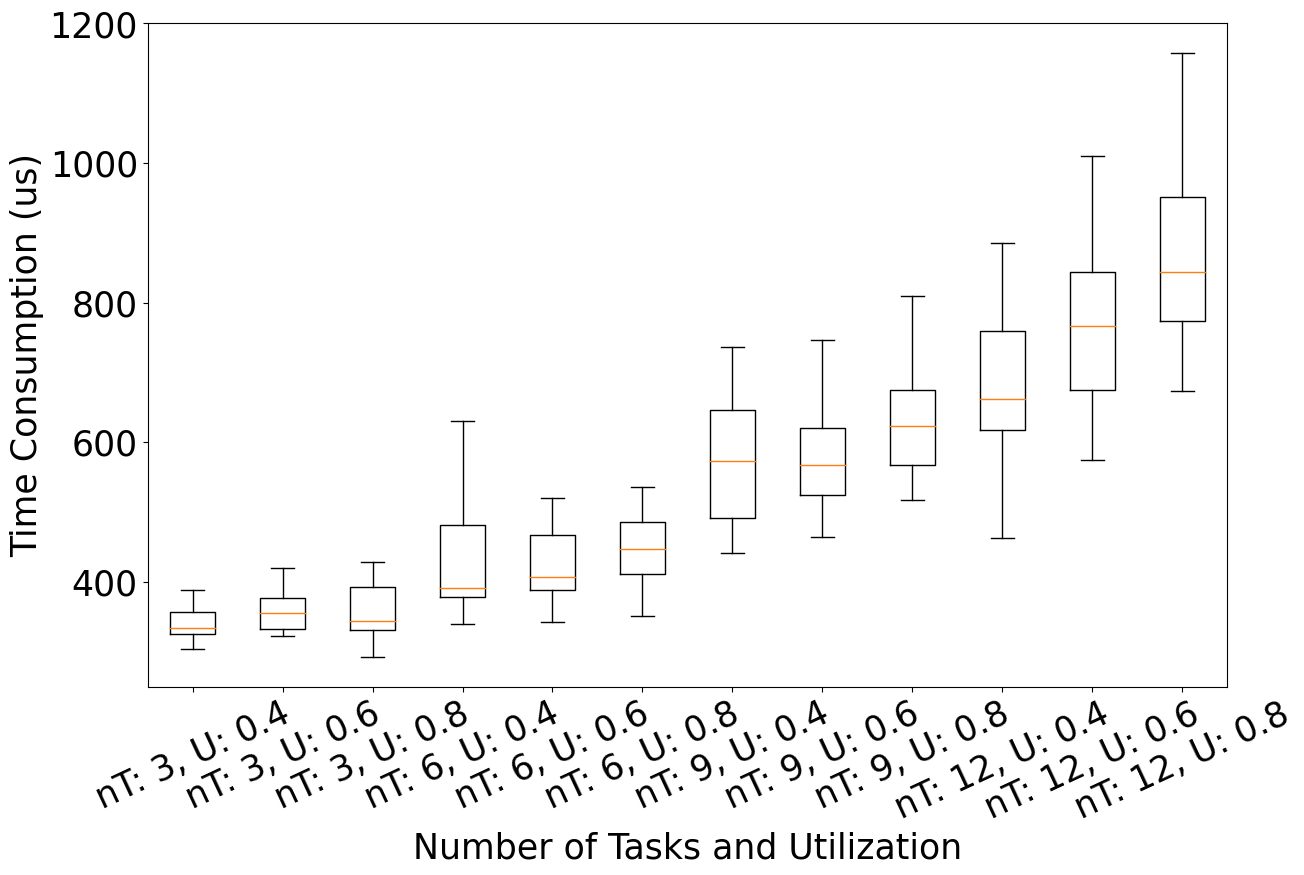

Max :  1608 Min :  293


In [5]:
# visualize the time consumption of the proposed algorithm
values = "proposed_timeConsumption(us)"
title = 'Time Consumption of the Proposed (us)'
show_3D_plot(time_data, time_data[values], title)
show_bar_chart(time_data, values, title, 17, 20)
show_box_plot(summary_result_path, values, title, 25, 25)

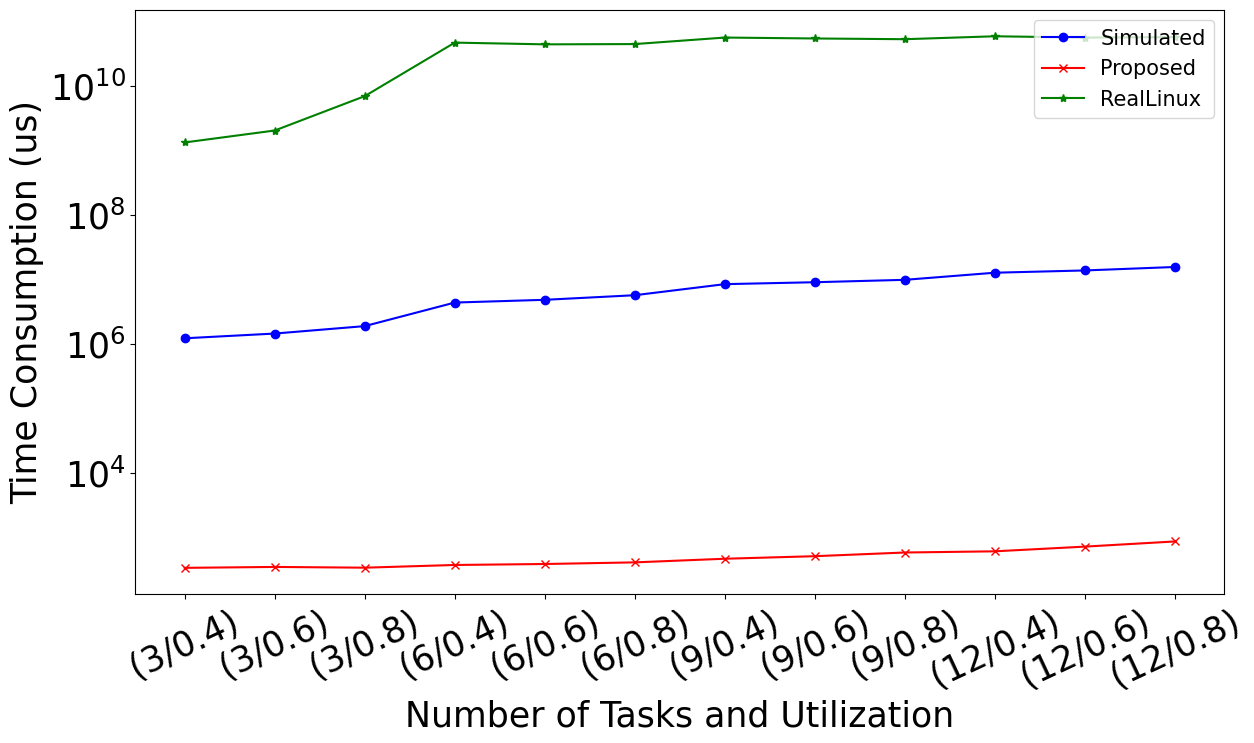

In [2]:
# For Figure 6 in the paper

import pandas as pd
import matplotlib.pyplot as plt

# load data from 
file_path = "../../real_linux_application/exp_results_CFS/time_analysis2.xlsx"
time_df = pd.read_excel(file_path)

time_df = time_df[2:]
time_df.columns = time_df.iloc[0]
time_df = time_df[1:]

time_df = time_df.drop(["schedule_count", "simulated time"], axis=1)

grouped = time_df.groupby(["numTasks", "utilization"]).mean().reset_index()
grouped["simulator_timeConsumption(us)"] = grouped["simulator_timeConsumption(us)"].astype(int)
grouped["proposed_timeConsumption(us)"] = grouped["proposed_timeConsumption(us)"].astype(int)
grouped["realLinux_timeConsumption(us)"] = grouped["realLinux_timeConsumption(us)"].astype(int)


labels = []
simulated = []
proposed = []
realLinux = []

# set f"({data.numTasks}, {data.utilization}) from grouped into labels
for index, data in grouped.iterrows():
    labels.append(f"({data.numTasks}/{data.utilization})")
    simulated.append(data["simulator_timeConsumption(us)"])
    proposed.append(data["proposed_timeConsumption(us)"])
    realLinux.append(data["realLinux_timeConsumption(us)"])


fontsize = 25
tick_rotation = 25
# Create the box plot
plt.figure(figsize=(12, 7))

plt.yscale("log")
# draw plot for simulated and labels
plt.plot(labels, simulated, marker='o', linestyle='-', color='b', label='Simulated')
plt.plot(labels, proposed, marker='x', linestyle='-', color='r', label='Proposed')
plt.plot(labels, realLinux, marker='*', linestyle='-', color='g', label='RealLinux')
plt.xticks(rotation=tick_rotation)
plt.xlabel('Number of Tasks and Utilization', fontsize=fontsize)
plt.ylabel('Time Consumption (us)', fontsize=fontsize)
# plt.title(title, fontsize=fontsize)
plt.tight_layout()

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='upper right', fontsize=fontsize-10)

# Display the plot
plt.show()

    
